# 3. Practice recognition of handwritten characters (numbers)

In [1]:
# coding: utf-8
'''
    Initial setting. Please do not change this cell
'''
%matplotlib inline
import numpy as np # Import numpy library
import matplotlib.pyplot as plt # Draw graph
import os, sys
sys.path.append(os.pardir)  # Settings for importing files in parent directory
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer
from common.functions import sigmoid

## 3-1. Display MNIST data

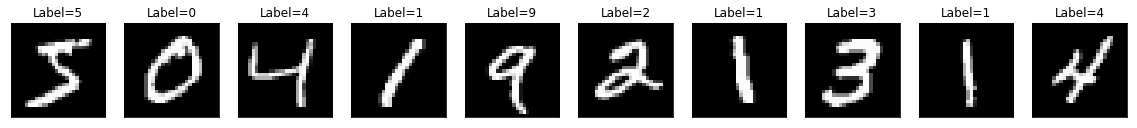

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True) # Load MNIST data
'''
    x_train: Training data                          (60000, 784)
    t_train: Correct answer label for training data (60000,)
    x_test: Test data                               (10000, 784)
    t_test: Correct answer label for test data      (10000,)
'''
number_images = 10 # Read only the first ten data

fig = plt.figure(figsize=(20, 2)) # Draw a graph after this line
for number in range(number_images):
    fig.add_subplot(1,number_images,number+1)
    plt.title("Label={0}".format(t_train[number])) # Display correct answer label
    plt.imshow(np.array(x_train[number].reshape(28, 28)),cmap='gray', aspect="equal") # Form an image to 28 x 28 and draw
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off") # Delete axis

## 3-2. Training of neural network

train loss:2.41358648439 === epoch:1, train acc:0.0993, test acc:0.1032 ===
train loss:2.20126121434 === epoch:2, train acc:0.422016666667, test acc:0.4277 ===
train loss:2.04059184436 === epoch:3, train acc:0.58165, test acc:0.5893 ===
train loss:1.76019446933 === epoch:4, train acc:0.59105, test acc:0.5968 ===
train loss:1.54966506252 === epoch:5, train acc:0.66955, test acc:0.6802 ===
train loss:1.31295061314 === epoch:6, train acc:0.707883333333, test acc:0.7182 ===
train loss:1.16655014983 === epoch:7, train acc:0.737983333333, test acc:0.7488 ===
train loss:0.933959899198 === epoch:8, train acc:0.765583333333, test acc:0.7726 ===
train loss:0.867822396071 === epoch:9, train acc:0.785033333333, test acc:0.7916 ===
train loss:0.712180237832 === epoch:10, train acc:0.79615, test acc:0.803 ===
train loss:0.742251018894
=============== Final Test Accuracy ===============
test acc:0.8211


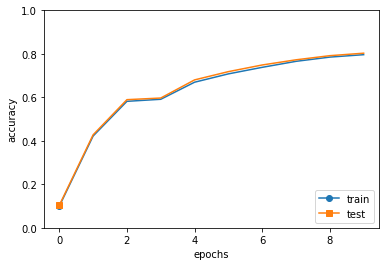

In [3]:
'''
    The following four lines are where learning processing is done.
    Randomly extract 100 images from 60,000 sheets, calculate the value of the loss function, and display it as train loss.
    Epoch +1 for each of the above 600 iterations, precision for training and test data are displayed.
'''
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[50, 100], output_size=10, activation="sigmoid")
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=10, mini_batch_size=100, optimizer="SGD", optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

'''
    Repeat epoch up to 10 and display the result as a graph
'''
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 3-3. Test by trained neural network

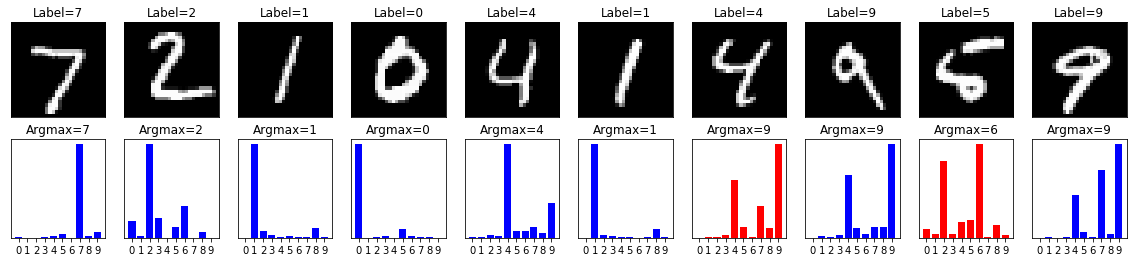

In [4]:
'''
    Read the optimized parameters (so far) by the previous training
'''
W1, W2, W3 = network.params['W1'].T, network.params['W2'].T, network.params['W3'].T
b1, b2, b3 = network.params['b1'], network.params['b2'], network.params['b3']

'''
    Inserting the first ten of the test data into the trained neural network and displaying the result of test
'''
fig = plt.figure(figsize=(20, 4))
for ittr in range(10):

# The next three lines are the test calculations
    z1 = sigmoid( np.dot(W1, x_test[ittr]) + b1 )
    z2 = sigmoid( np.dot(W2, z1) + b2 )
    z3 = np.dot(W3, z2) + b3

# The processing of display
    if np.argmax(z3) == t_test[ittr]:
        t_color = "blue"
    else:
        t_color = "red"

    fig.add_subplot(2, 10 , ittr+1)
    plt.title("Label={0}".format(t_test[ittr])) # Display of correct answer label
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
    plt.imshow(np.array(x_test[ittr].reshape(28, 28)),cmap='gray', aspect="equal")
    
    fig.add_subplot(2, 10, ittr+11)
    plt.bar(np.array(range(10)), np.exp(z3)/np.sum(np.exp(z3)), color=t_color)
    plt.tick_params(labelleft="off", left="off")
    plt.title("Argmax={0}".format(np.argmax(z3))) # Display test result
    plt.xticks(range(10))
    
plt.show()

## 3-4. Let's look at weight parameter W1 after training

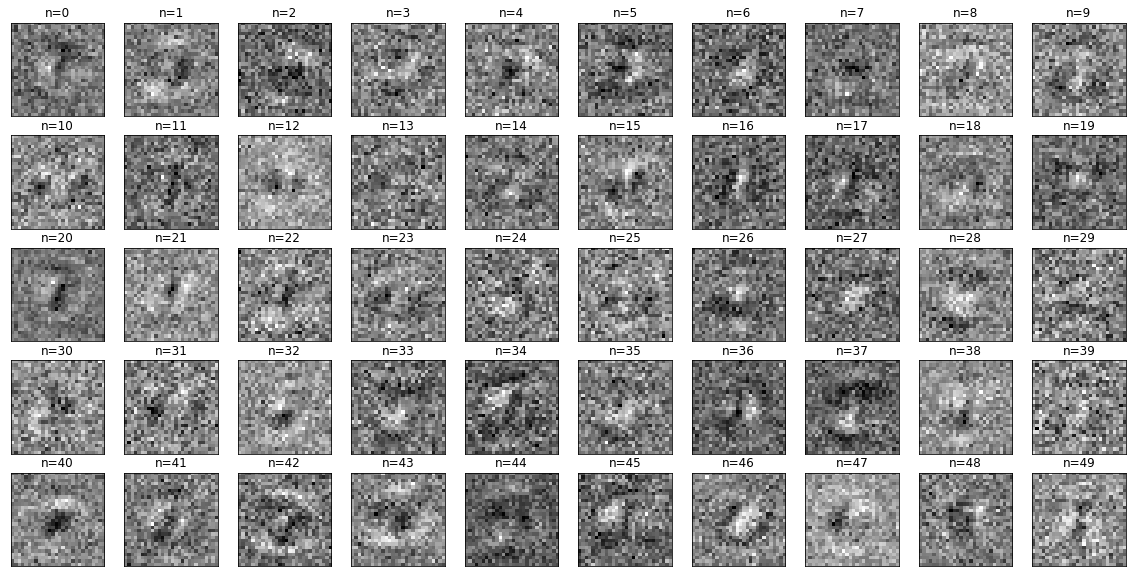

In [5]:
# The elements of each column of W 1 are shown at 28 × 28
fig = plt.figure(figsize=(20, 10))
for ittr in range(50):
    fig.add_subplot(5, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W1[ittr].reshape(28,28)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()

## 3-5. Let's superimpose W1 with the weight of W2

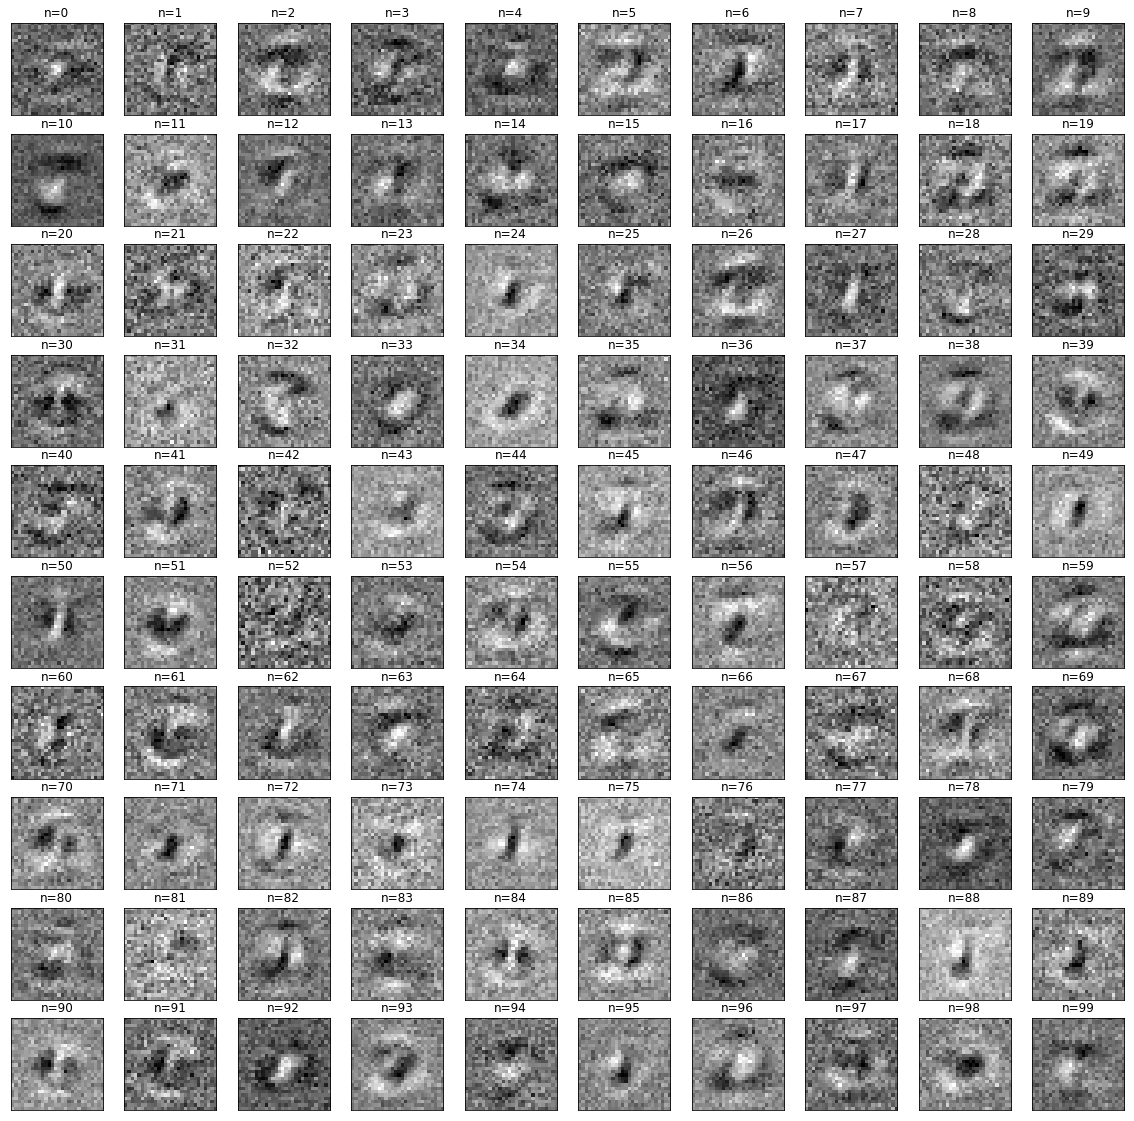

In [6]:
W1w = np.zeros((100,784))
for j in range(100):
    for i in range(50):
        W1w[j][:] += W1[i][:] * W2[j][i]
        
fig = plt.figure(figsize=(20, 20))
for ittr in range(100):
    fig.add_subplot(10, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W1w[ittr].reshape(28,28)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()

## 3-6. We will also superimpose with the weight of W3

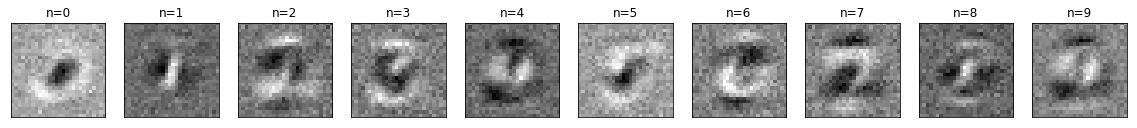

In [7]:
W2w = np.zeros((10,784))
for j in range(10):
    for i in range(100):
        W2w[j][:] += W1w[i][:] * W3[j][i]
        
fig = plt.figure(figsize=(20, 2))
for ittr in range(10):
    fig.add_subplot(1, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W2w[ittr].reshape(28,28)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()